# Traffic Sign Recognition Using Deep Learning
One of the applications where deep learning is being used extensively is Autonomous Driving. The autonous driving mechanism needs to detect innumerable objects (pedestrians, other cars, obstacles etc) and make decisions. One of the smaller problems is to detect traffic signs and make decisions accordingly. We are going to solve problems of detecting traffic signs on the road.

We are going to use The German Traffic Sign Recognition Benchmark(GTSRB) dataset.

The training dataset contains around 39,000 images while test dataset contains around 12,000 images containing 43 different classes. We will be using Convolutional Neural Networks(CNN) to solve this problem using Keras framework and tensorflow as backend.

**import the liabraries**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from PIL import Image
from tensorflow.keras.optimizers import Adam


%matplotlib inline

In [ ]:
data_dir = '/content/drive/MyDrive/capstone_project2'
train_path = '/content/drive/MyDrive/capstone_project2/Train'
test_path = '/content/drive/MyDrive/capstone_project2/Test'
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

# Label Overview

In [ ]:

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

### Visualizing The Dataset

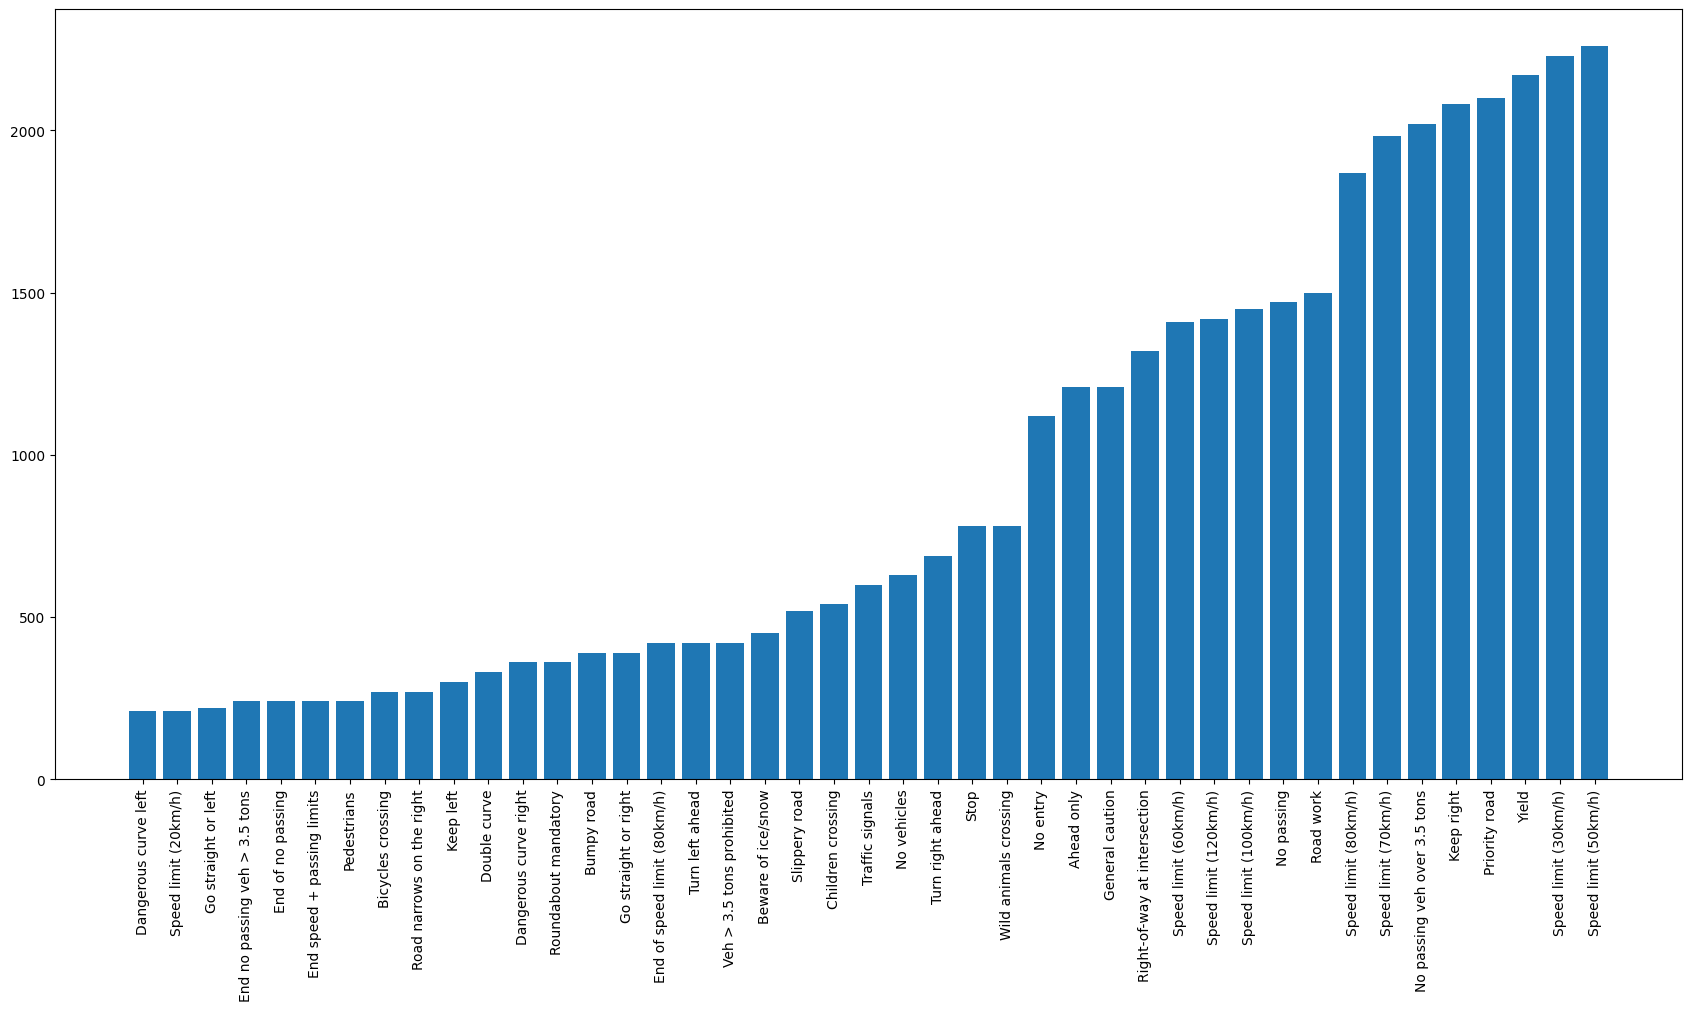

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

### Visualizing 25 random images from test data

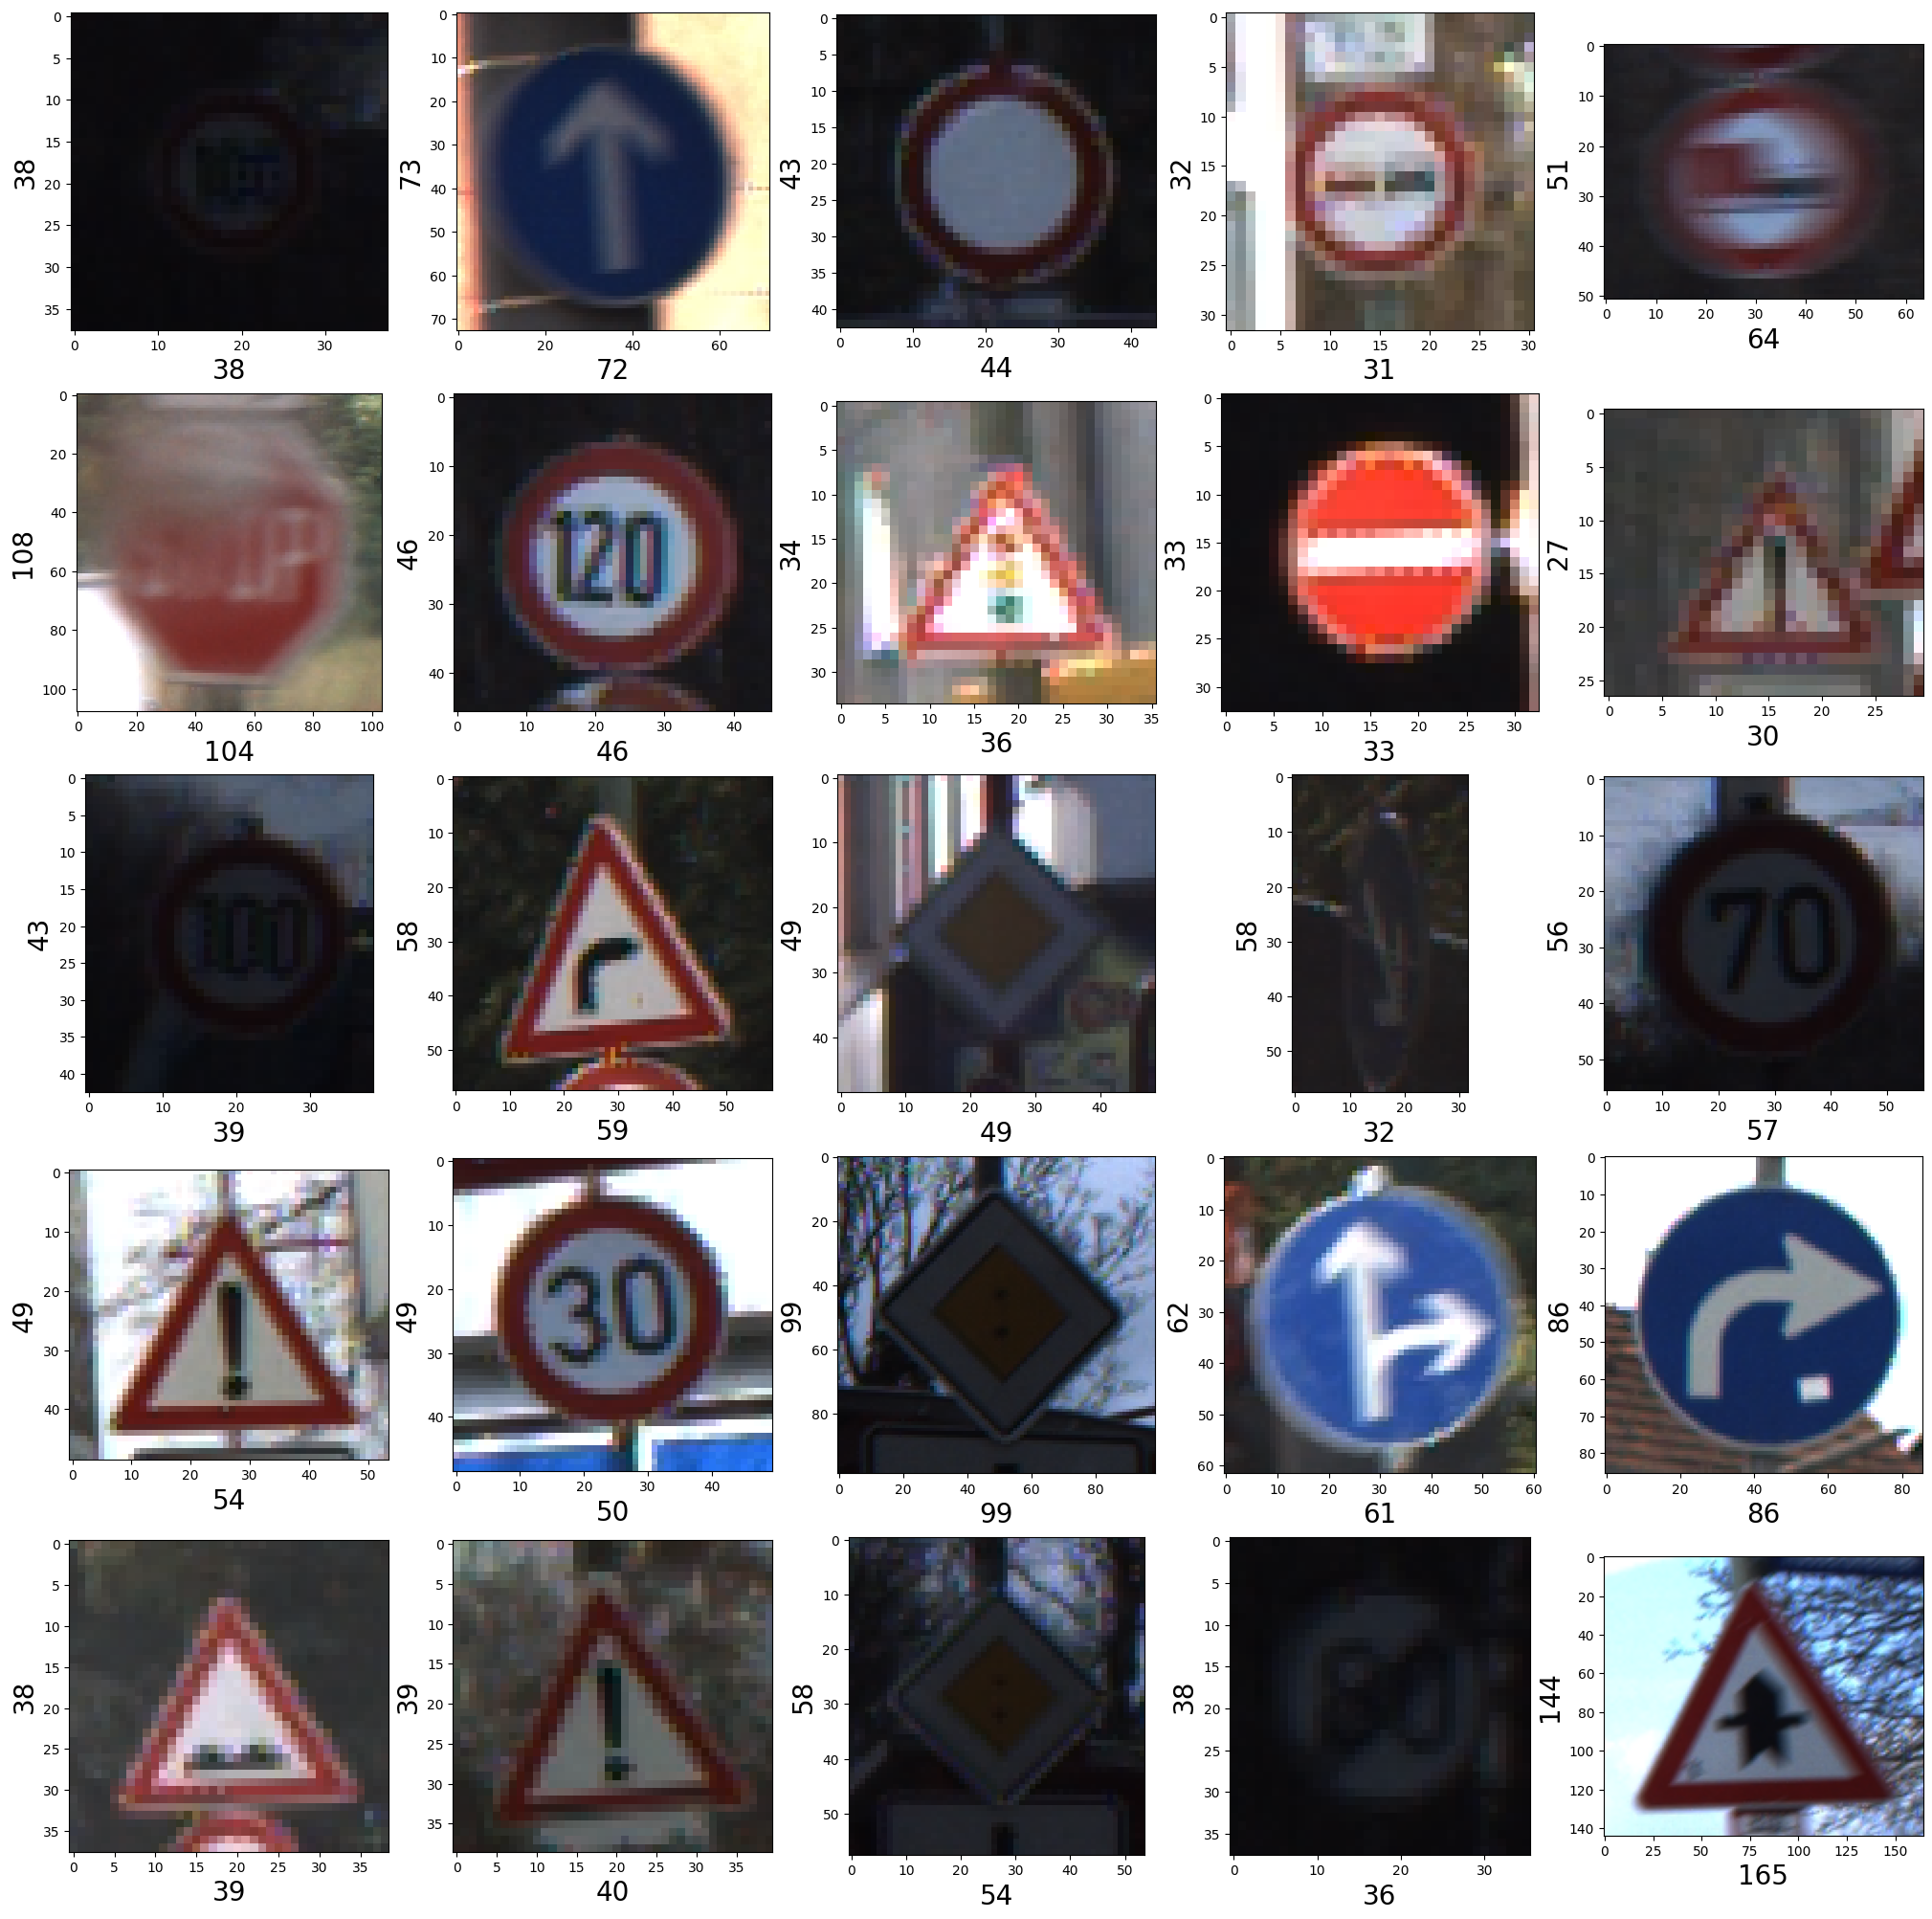

In [ ]:

import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(visible=0)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

## Loading data from Train folder

In [ ]:
def load_data(data_dir):

    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)

    return images, labels



The images are loaded, resized to a target size of (30, 30), and converted into NumPy arrays. The function then returns two lists: images, which contains the image data, and labels, which contains the corresponding labels for each image.

In [ ]:
images, labels = load_data(train_path)

# One hot encoding the labels
labels = to_categorical(labels)

# Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(
                                                    np.array(images),
                                                    labels,
                                                    test_size=0.2 , #the number that defines the size of the test set.
                                                    random_state=42,
                                                    shuffle=True
                                                    ) 

In [ ]:
print("X_train.shape", x_train.shape)
print("X_valid.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_test.shape)


X_train.shape (31472, 30, 30, 3)
X_valid.shape (7869, 30, 30, 3)
y_train.shape (31472, 43)
y_valid.shape (7869, 43)


###  Creating the Model

## Building Convolutional Neural Network Model
We will now build our sequential CNN model with following specifications:
- convolutional layer followed by one hidden layer and one output layer(fully connected or dense layer).
- Dropout layers for regularization to avoid overfitting
- Relu activation function for all convolutional layers
- Softmax activation function for output layer as it is a multi-class classification problem
- Flatten layer for reshaping the output of the convolutional layer

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25)) 

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

### Compiling the model

In [ ]:
imgs_path = "/content/drive/MyDrive/capstone_project2/Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((30,30))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)
print(data)

[[[[ 69  73  73]
   [ 76  79  79]
   [ 75  77  77]
   ...
   [ 76  81  80]
   [ 71  77  77]
   [ 66  68  70]]

  [[ 65  69  69]
   [ 74  76  76]
   [ 84  84  83]
   ...
   [ 90  83  89]
   [ 74  79  84]
   [ 67  69  73]]

  [[ 63  68  68]
   [ 71  72  72]
   [ 81  79  77]
   ...
   [105  86  91]
   [ 71  75  76]
   [ 69  71  69]]

  ...

  [[164 139 142]
   [157 139 144]
   [151 139 143]
   ...
   [ 76  77  79]
   [ 77  80  76]
   [ 90  93  82]]

  [[102 103 104]
   [103 102 104]
   [101  97 103]
   ...
   [ 80  81  82]
   [ 92  95  91]
   [106 110 101]]

  [[ 72  74  74]
   [ 82  83  82]
   [ 92  92  99]
   ...
   [ 74  74  75]
   [103 103 100]
   [101 104  96]]]


 [[[ 98 102  99]
   [ 84  88  81]
   [ 83  84  78]
   ...
   [107  97 101]
   [223 233 244]
   [255 255 255]]

  [[ 76  61  46]
   [ 74  58  44]
   [ 76  60  48]
   ...
   [100  93  76]
   [221 223 218]
   [255 255 255]]

  [[ 72  51  37]
   [ 71  50  36]
   [ 74  56  41]
   ...
   [168 141 123]
   [241 235 226]
   [255 255

In [ ]:
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, shuffle=True)

### Fitting the model

In [ ]:
model.compile(optimizer='adam',       ##adam - It specifies the optimizer to be used during training
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history= model.fit(X_train,Y_train,
                 epochs=15,
                 batch_size=64,
                 validation_data=(X_val,Y_val))

Epoch 1/15
492/492 [==============================] - 104s 206ms/step - loss: 1.5437 - accuracy: 0.6714 - val_loss: 0.1268 - val_accuracy: 0.9695
Epoch 2/15
492/492 [==============================] - 101s 205ms/step - loss: 0.2572 - accuracy: 0.9289 - val_loss: 0.0734 - val_accuracy: 0.9837
Epoch 3/15
492/492 [==============================] - 102s 207ms/step - loss: 0.1407 - accuracy: 0.9605 - val_loss: 0.0395 - val_accuracy: 0.9908
Epoch 4/15
492/492 [==============================] - 102s 208ms/step - loss: 0.1039 - accuracy: 0.9696 - val_loss: 0.0360 - val_accuracy: 0.9903
Epoch 5/15
492/492 [==============================] - 99s 202ms/step - loss: 0.1000 - accuracy: 0.9716 - val_loss: 0.0312 - val_accuracy: 0.9934
Epoch 6/15
492/492 [==============================] - 99s 202ms/step - loss: 0.0846 - accuracy: 0.9758 - val_loss: 0.0401 - val_accuracy: 0.9931
Epoch 7/15
492/492 [==============================] - 95s 193ms/step - loss: 0.0854 - accuracy: 0.9758 - val_loss: 0.0291 - va

## Plotting the Accuracy and Loss values

Figure(1200x1000)
[<Axes: title={'center': 'Accuracy'}> <Axes: title={'center': 'Loss'}>]


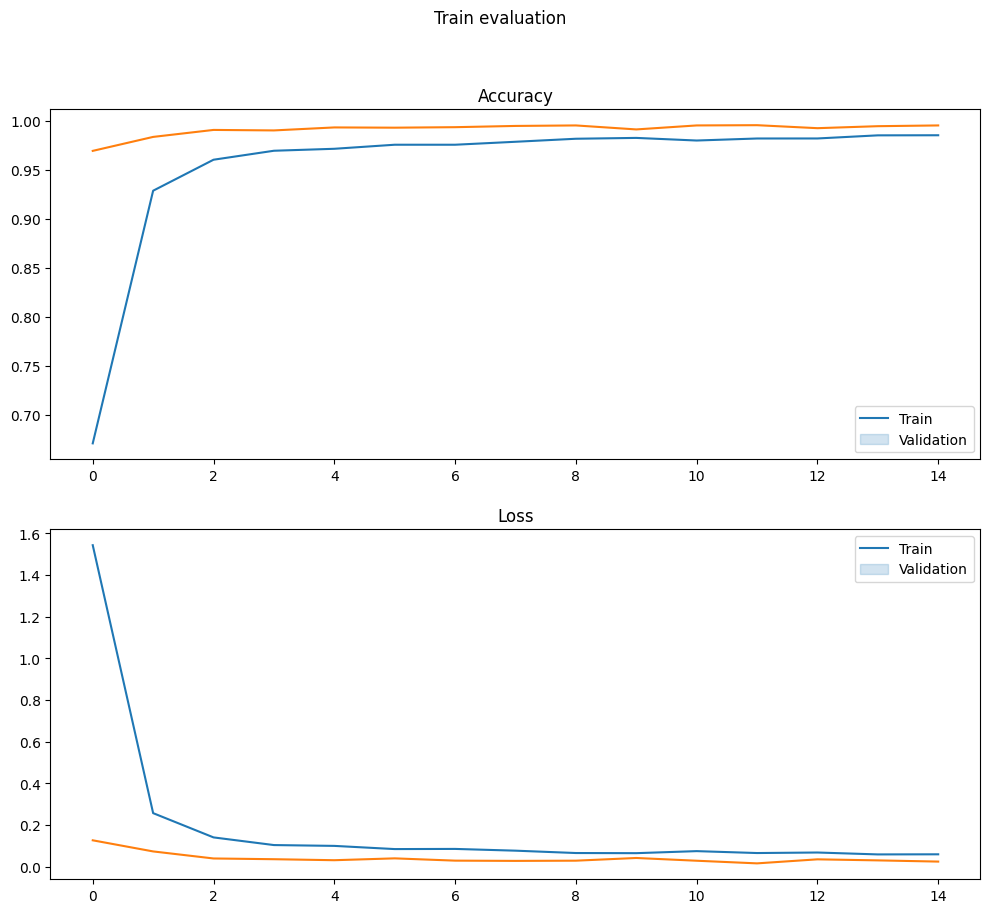

In [ ]:
import seaborn as sns
fig,ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')
print(fig)
print(ax)

Summarize history for Loss

## find the predictions

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

## Conclusion

We created a Convolutional Neural Network (CNN) model to classify traffic sign images. We started with exploring our dataset of German traffic signs. Then we performed pre-processing of images (Histogram equalization and rescaling to same size) to make them suitable for CNN. We built a simple CNN model using Keras with 6 convolutional layer followed by one hidden layer, one output layer(fully connected or dense layer). We used dropout layers to avoid overfitting. After that we trained our model with our training dataset. The evaluation of model resulted in 98.3% accuracy. We used data augmentation techniques to further improve accuracy to 98.4%. The human accuracy for this dataset is 99.84%. Pretty Close!

In [ ]:
import pickle

In [ ]:
filename = 'Traffic-Sign-Recognition.pkl'
pickle.dump(model, open(filename, 'wb'))